## bagging
- 배깅은 bootstrp aggregating의 준말로 원 데이터 집합으로부터 크기가 같은 표본을 여러번 단순 임의 복원추출하여 각 표본에 대해 분류기를 생성한 후 그 결과를 앙상블하는 방법이다.

In [2]:
library(adabag)

Loading required package: rpart
Loading required package: mlbench
Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2


In [3]:
data(iris)

In [4]:
iris.bagging <- bagging(Species~., data=iris, mfinal=10)

In [6]:
iris.bagging$importance

# Species를 결정짓는 변수의 중요도를 아래와 같이 계산함. 
# Petal.Length가 가장 높다. 

Petal.Length  Petal.Width Sepal.Length  Sepal.Width 
    68.69924     31.30076      0.00000      0.00000

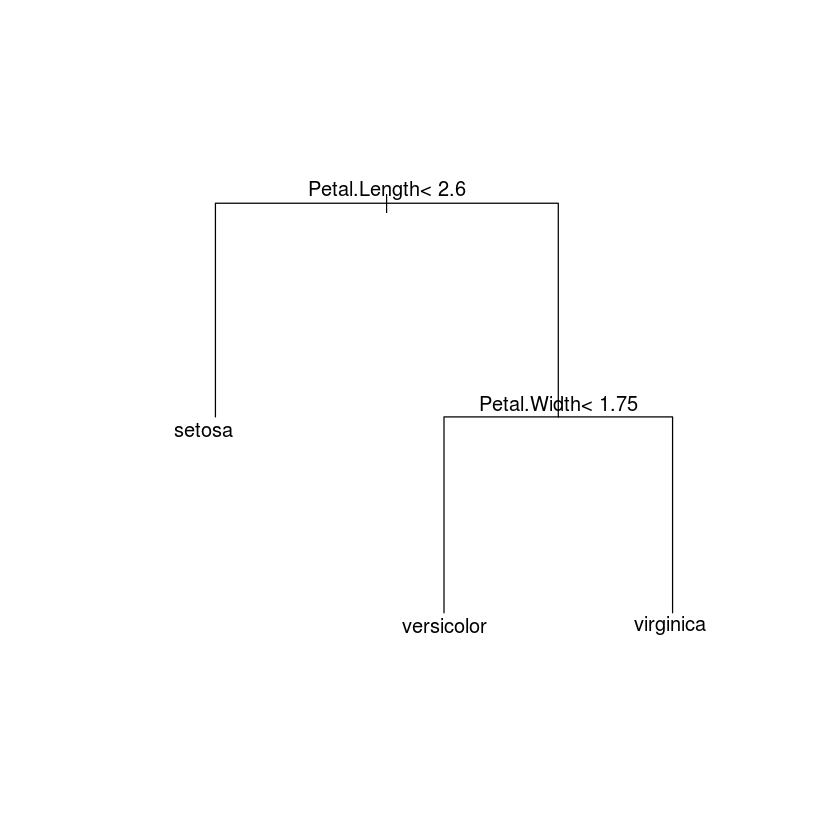

In [10]:
plot(iris.bagging$trees[[10]], margin = 0.2)
text(iris.bagging$trees[[10]])

In [11]:
# predict해보기!
pred <- predict(iris.bagging, newdata=iris)
table(pred$class, iris[,5])

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         49         5
  virginica       0          1        45

### 적용

In [14]:
setwd('/home/jovyan/work/Encore/data')

In [15]:
train <- read.csv("train.csv",colClasses = c("Fuel_Type" = "character", "Color" = "character"))

In [18]:
train <- train[-78,]
rownames(train) <- NULL

In [17]:
train <- train[-55,]
rownames(train) <- NULL

In [24]:
con_var = c('Price','KM', 'Age_08_04', 'Weight')
train_test = train[,con_var]

head(train_test)

Price,KM,Age_08_04,Weight
13500,46986,23,1165
13750,72937,23,1165
13750,38500,30,1170
20950,31461,25,1185
19600,32189,25,1185
21500,23000,31,1185


In [25]:
toyota.bagging <- bagging(Price~., data=train_test, mfinal=10)

ERROR: Error in 1:nrow(object$splits): argument of length 0


### -2. Boosting
- 부스팅은 배깅의 과정과 유사하나 붓스트랩 표본을 구성하는 재표본 과정에서 각 자료에동일 확률을 부여하는 것이 아니라, 분류가 잘못된 데이터에 더 큰 가중을 주어 표본을 추출한다.
- 부스팅에서는 붓스트랩 표본을 추출하여 분류기를 만든 후, 그 분류결과를 이용하여 각 데이터가 추출될 확률을 조정한다.

#### 예제 1

In [26]:
library(adabag)

In [27]:
data(iris)

In [30]:
boo.adabag <- boosting(Species~., data=iris, boos=TRUE, mfinal =10 )

In [31]:
boo.adabag$importance

Petal.Length  Petal.Width Sepal.Length  Sepal.Width 
   68.750964    21.071177     1.901804     8.276055

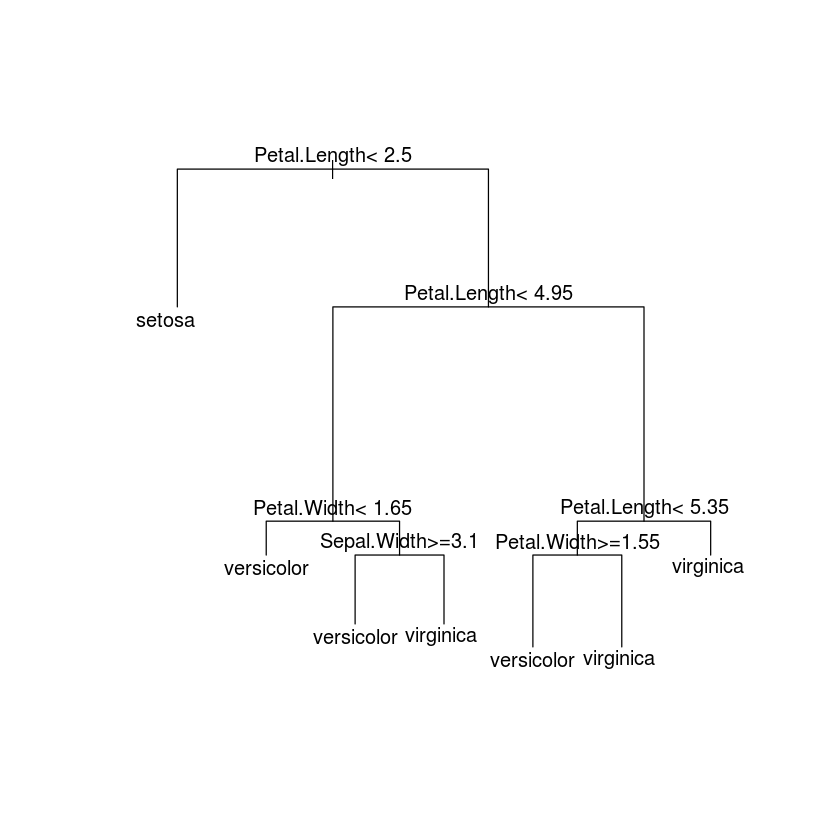

In [33]:
# plot으로 그려보기
plot(boo.adabag$trees[[10]], margin=0.1)
text(boo.adabag$trees[[10]])

In [34]:
# 예측
pred <- predict(boo.adabag, newdata=iris)
tb <- table(pred$class, iris[,5])
tb


            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         50         0
  virginica       0          0        50

In [36]:
# 오분류율 계산
error.rpart<- 1-(sum(diag(tb))/sum(tb))
error.rpart  #오류 0


[1] 0

#### 예제 2

##### -1 데이터 읽기 및 전처리

In [40]:
library(ada)
data(iris)

In [41]:
iris[iris$Species!="setosa",] -> iris # setosa 50개 자료 제외 

In [44]:
n <- dim(iris)[1]

##### -2. training, testing data 나누기

In [45]:
trind <- sample(1:n, floor(.6*n), FALSE)
teind <- setdiff(1:n, trind)
iris[,5] <- as.factor((levels(iris[,5])[2:3])[as.numeric(iris[,5])-1])

##### -3. 예측해보기

In [47]:
gdis<-ada(Species~., data=iris[trind,], iter=20, nu=1, type="discrete")
gdis<- addtest(gdis, iris[teind, -5], iris[teind,5])
gdis

Call:
ada(Species ~ ., data = iris[trind, ], iter = 20, nu = 1, type = "discrete")

Loss: exponential Method: discrete   Iteration: 20 

Final Confusion Matrix for Data:
            Final Prediction
True value   versicolor virginica
  versicolor         31         0
  virginica           0        29

Train Error: 0 

Out-Of-Bag Error:  0.017  iteration= 19 

Additional Estimates of number of iterations:

train.err1 train.kap1 test.errs2 test.kaps2 
        14         14          1          1 


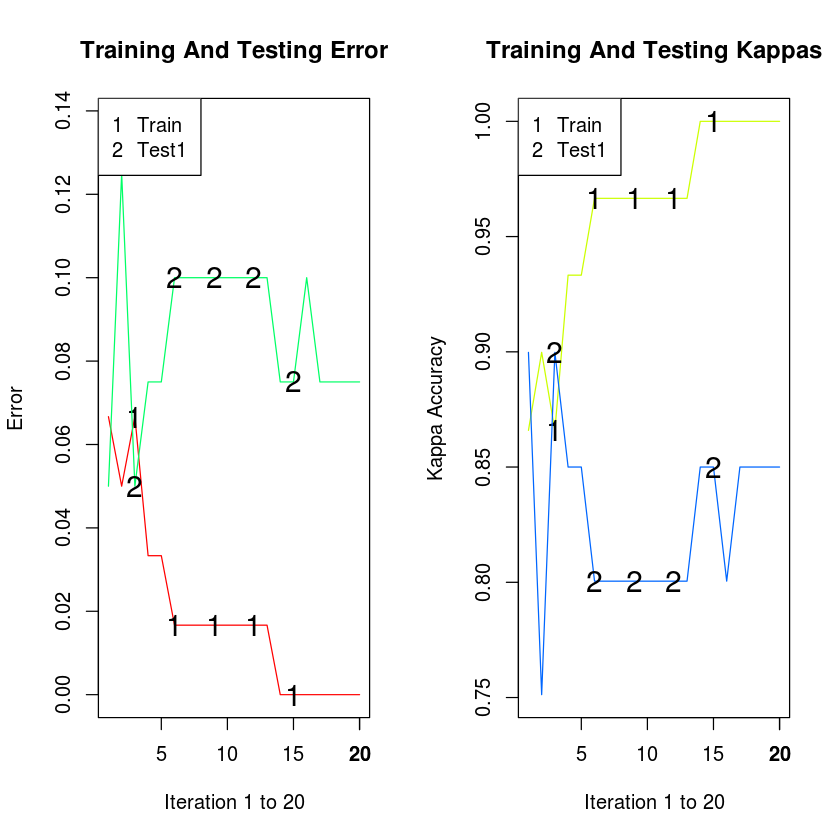

In [48]:
plot(gdis, TRUE, TRUE)

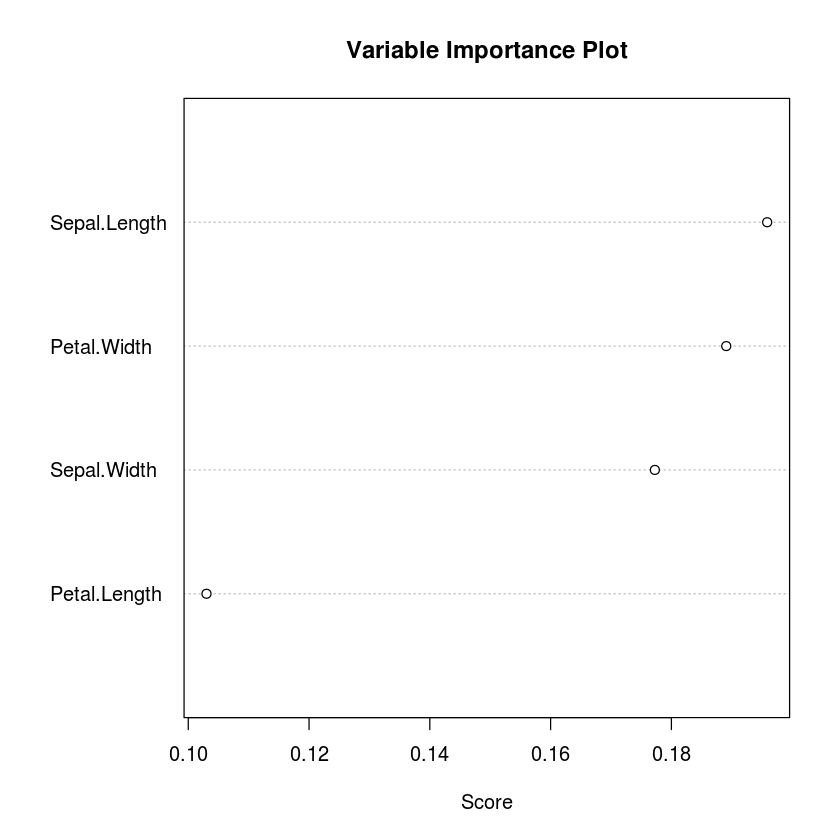

In [49]:
varplot(gdis)
# Sepal.Length변ㄴ수가 분류에 가장 중요한 변수로 사용되었음.

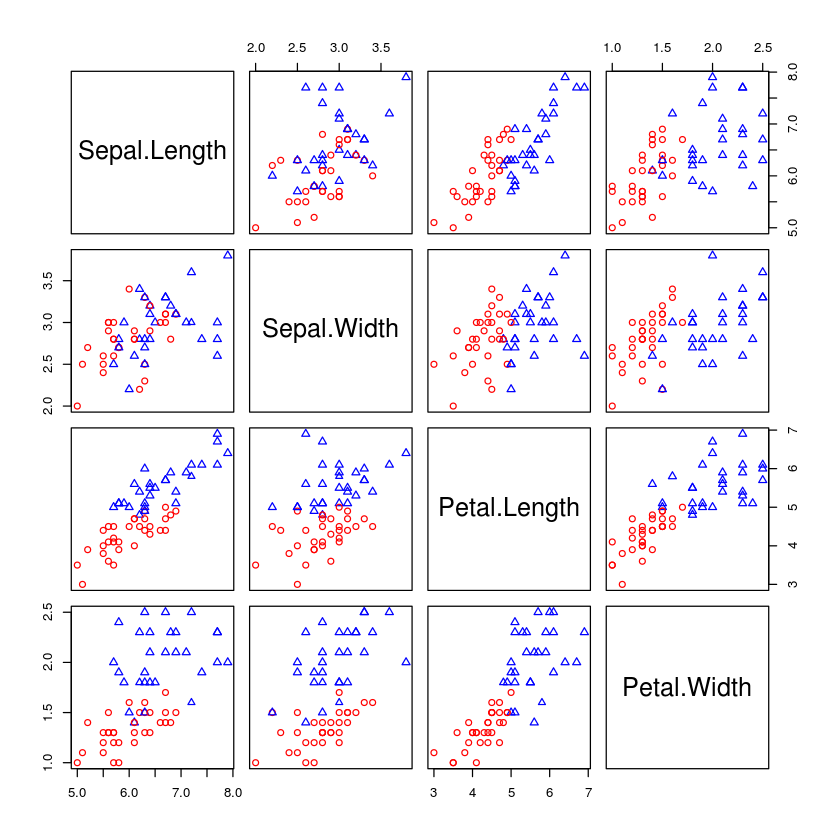

In [50]:
pairs(gdis, iris[trind,-5], maxvar=4)
#marvar = 변수의수(중요도가 높은 사우이 변수의 수)